In [ ]:
!pip install cy
!pip install pandas==1.1.1

In [ ]:
import logging
import numpy as np
import pandas as pd
import pkg_resources
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt
from crispy.Utils import Utils
from adjustText import adjust_text
from sklearn.manifold import TSNE
from crispy.DataImporter import PPI
from crispy.CrispyPlot import CrispyPlot
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests

In [ ]:
import matplotlib.font_manager
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.family'] = 'Arial'

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
DPATH = "/content/drive/My Drive/DataFolder_CMRI_Sanger/Figures_Source/"

RPATH = '/content/drive/My Drive/SangerDrug/DataFolder_CMRI_Sanger/Figures_Plots/'

# Emanuel please uncomment below for your usage.
# RPATH = "/content/drive/My Drive/DataFolder_CMRI_Sanger/Figures_Plots/"


In [ ]:
from crispy.GIPlot import GIPlot
from crispy.CrispyPlot import CrispyPlot

sns.set(
    style="ticks",
    context="paper",
    font_scale=0.75,
    font="sans-serif",
    rc=CrispyPlot.SNS_RC,
)

In [ ]:
PALETTE_CTYPE = {
    "Non-Small Cell Lung Carcinoma": "#007fff",
    "Prostate Carcinoma": "#665d1e",
    "Gastric Carcinoma": "#ffbf00",
    "Glioblastoma": "#fbceb1",
    "Melanoma": "#ff033e",
    "Bladder Carcinoma": "#ab274f",
    "B-Lymphoblastic Leukemia": "#d5e6f7",
    "Kidney Carcinoma": "#7cb9e8",
    "Thyroid Gland Carcinoma": "#efdecd",
    "Rhabdomyosarcoma": "#8db600",
    "Head and Neck Carcinoma": "#e9d66b",
    "Ovarian Carcinoma": "#b284be",
    "B-Cell Non-Hodgkin's Lymphoma": "#b2beb5",
    "Other Solid Carcinomas": "#10b36f",
    "Ewing's Sarcoma": "#6e7f80",
    "T-Lymphoblastic Leukemia": "#ff7e00",
    "Plasma Cell Myeloma": "#87a96b",
    "Endometrial Carcinoma": "#c9ffe5",
    "Non-Cancerous": "#9f2b68",
    "Breast Carcinoma": "#00ffff",
    "Pancreatic Carcinoma": "#008000",
    "Neuroblastoma": "#cd9575",
    "Burkitt's Lymphoma": "#72a0c1",
    "Hairy Cell Leukemia": "#a32638",
    "Chronic Myelogenous Leukemia": "#9966cc",
    "Glioma": "#f19cbb",
    "Cervical Carcinoma": "#e32636",
    "Colorectal Carcinoma": "#3b7a57",
    "Hepatocellular Carcinoma": "#faebd7",
    "Vulvar carcinoma": "#fdee00",
    "Osteosarcoma": "#00308f",
    "Chondrosarcoma": "#7fffd4",
    "Small Cell Lung Carcinoma": "#c46210",
    "Esophageal Carcinoma": "#a8bb19",
    "Uncertain": "#ff9966",
    "T-Cell Non-Hodgkin's Lymphoma": "#a52a2a",
    "Non-small Cell Lung Carcinoma": "#568203",
    "Other Sarcomas": "#4b5320",
    "Biliary Tract Carcinoma": "#5d8aa8",
    "Acute Myeloid Leukemia": "#8f9779",
    "Hodgkin's Lymphoma": "#915c83",
    "Mesothelioma": "#841b2d",
    "B-Lymphoblastic leukemia": "#a4c639",
    "Other Blood Cancers": "#3b444b",
    "Carcinoid Tumour": "#006600",
    "Leiomyosarcoma": "#0000ff",
    "T-cell Non-Hodgkin's Lymphoma": "#666699",
    "Other": "whitesmoke"
}

PALETTE_TTYPE = {
    "Lung": "#007fff",
    "Prostate": "#665d1e",
    "Stomach": "#ffbf00",
    "Central Nervous System": "#fbceb1",
    "Skin": "#ff033e",
    "Bladder": "#ab274f",
    "Haematopoietic and Lymphoid": "#d5e6f7",
    "Kidney": "#7cb9e8",
    "Thyroid": "#efdecd",
    "Soft Tissue": "#8db600",
    "Head and Neck": "#e9d66b",
    "Ovary": "#b284be",
    "Bone": "#b2beb5",
    "Endometrium": "#10b36f",
    "Breast": "#6e7f80",
    "Pancreas": "#ff7e00",
    "Peripheral Nervous System": "#87a96b",
    "Cervix": "#c9ffe5",
    "Large Intestine": "#9f2b68",
    "Liver": "#00ffff",
    "Vulva": "#008000",
    "Esophagus": "#cd9575",
    "Biliary Tract": "#72a0c1",
    "Other tissue": "#a32638",
    "Small Intestine": "#9966cc",
    "Placenta": "#f19cbb",
    "Testis": "#e32636",
    "Adrenal Gland": "#3b7a57",
    "Other": "whitesmoke"
}

PALETTE_INSTRUMENT = {
    "M01": "#66c2a5",
    "M02": "#fc8d62",
    "M03": "#8da0cb",
    "M04": "#e78ac3",
    "M05": "#a6d854",
    "M06": "#ffd92f",
}

PALETTE_BATCH = {
    "P01": "#7fc97f",
    "P02": "#beaed4",
    "P03": "#fdc086",
    "P04": "#386cb0",
    "P05": "#f0027f",
    "P06": "#bf5b17",
}

PALETTE_PERTURB = {
    "BT-549 10% FBS": "#1f77b4",
    "BT-549 1% FBS": "#aec7e8",
    "T-47D 10% FBS": "#ff7f0e",
    "T-47D 1% FBS": "#ffbb78",
    "HCC1395 10% FBS": "#2ca02c",
    "HCC1395 1% FBS": "#98df8a",
    "HCC1143 10% FBS": "#d62728",
    "HCC1143 1% FBS": "#ff9896",
    "MRC-5 (EXPO)": "#756bb1",
    "MRC-5 Arrested (5 days @100% confluent)": "#9e9ac8",
    "MRC-5 Arrested (8 days @100% confluent)": "#bcbddc",
}

PPI_PAL = {
    "T": "#fc8d62",
    "1": "#656565",
    "2": "#7c7c7c",
    "3": "#949494",
    "4": "#ababab",
    "5+": "#c3c3c3",
    "-": "#2b8cbe",
    "X": "#2ca02c",
}

PPI_ORDER = ["T", "1", "2", "3", "4", "5+", "-"]

In [ ]:
plot_df = pd.DataFrame(gc.open("Figures_Source_Data").worksheet("Fig3B_ml_benchmark").get_all_values()).T.set_index(0).T
plot_df["score"] = plot_df["score"].astype(float)
plot_df['model'] = plot_df['model'].map({'ElasticNet':'elastic net','DL':'DeepOmicNet', 'RF':'Random Forest'})
plot_df

,drug_id,score,data,model
1,1001;AICA Ribonucleotide;GDSC1,0.430351,Tissue,elastic net
2,1003;Camptothecin;GDSC2,0.553929,Tissue,elastic net
3,1004;Vinblastine;GDSC1,0.354500,Tissue,elastic net
4,1004;Vinblastine;GDSC2,0.497286,Tissue,elastic net
5,1005;Cisplatin;GDSC1,0.281850,Tissue,elastic net
...,...,...,...,...
12776,88;Entinostat;GDSC1,0.205165,Proteome,DeepOmicNet
12777,89;Parthenolide;GDSC1,0.343367,Proteome,DeepOmicNet
12778,91;GSK319347A;GDSC1,0.375071,Proteome,DeepOmicNet
12779,94;TGX221;GDSC1,0.531959,Proteome,DeepOmicNet


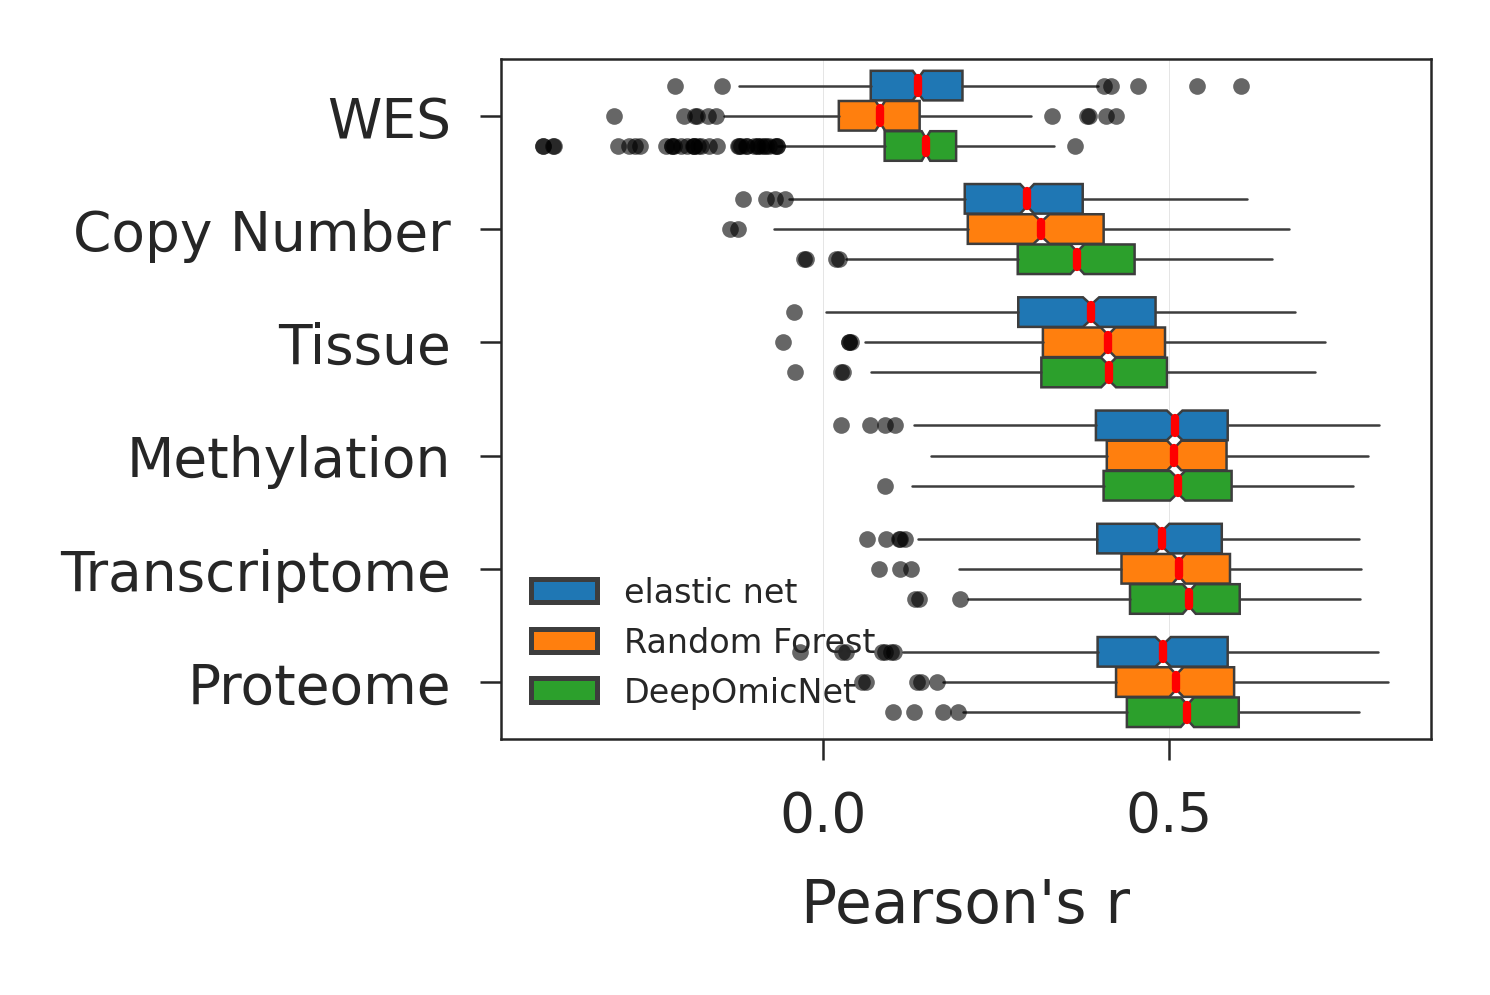

In [ ]:
order = ["WES", "Copy Number", "Tissue", "Methylation", "Transcriptome", "Proteome"]

_, ax = plt.subplots(1, 1, figsize=(2, 1.5), dpi=600)

sns.boxplot(
    x="score",
    y="data",
    hue="model",
    data=plot_df,
    order=order,
    notch=True,
    boxprops=dict(linewidth=0.3),
    whiskerprops=dict(linewidth=0.3),
    medianprops=CrispyPlot.MEDIANPROPS,
    flierprops=CrispyPlot.FLIERPROPS,
    palette="tab10",
    showcaps=False,
    saturation=1,
    orient="h",
    ax=ax,
)

ax.set_xlabel("Pearson's r")
ax.set_ylabel("")
ax.grid(axis="x", lw=0.1, color="#e1e1e1", zorder=0)

ax.legend(prop={"size": 4}, frameon=False, title="")

plt.savefig(f"{RPATH}/ML_performance.pdf", bbox_inches="tight")
plt.savefig(f"{RPATH}/ML_performance.png", bbox_inches="tight")

In [ ]:
plot_df = pd.DataFrame(gc.open("Figures_Source_Data").worksheet("Fig4A_scatter_rna_protein_crispr").get_all_values())
plot_df = plot_df.rename(columns=plot_df.iloc[0]).drop(plot_df.index[0]).set_index("Gene").replace("", np.nan).astype(float)
plot_df

,protein,RNA,delta
Gene,,,
A1BG,0.110802,0.191389,-0.080587
A1CF,0.139818,0.104988,0.034830
A2M,0.178802,0.273386,-0.094584
A2ML1,0.071717,0.011720,0.059997
A3GALT2,0.078424,0.058497,0.019927
...,...,...,...
ZYG11A,0.052049,0.038083,0.013965
ZYG11B,0.229845,0.102894,0.126951
ZYX,0.334101,0.255354,0.078748


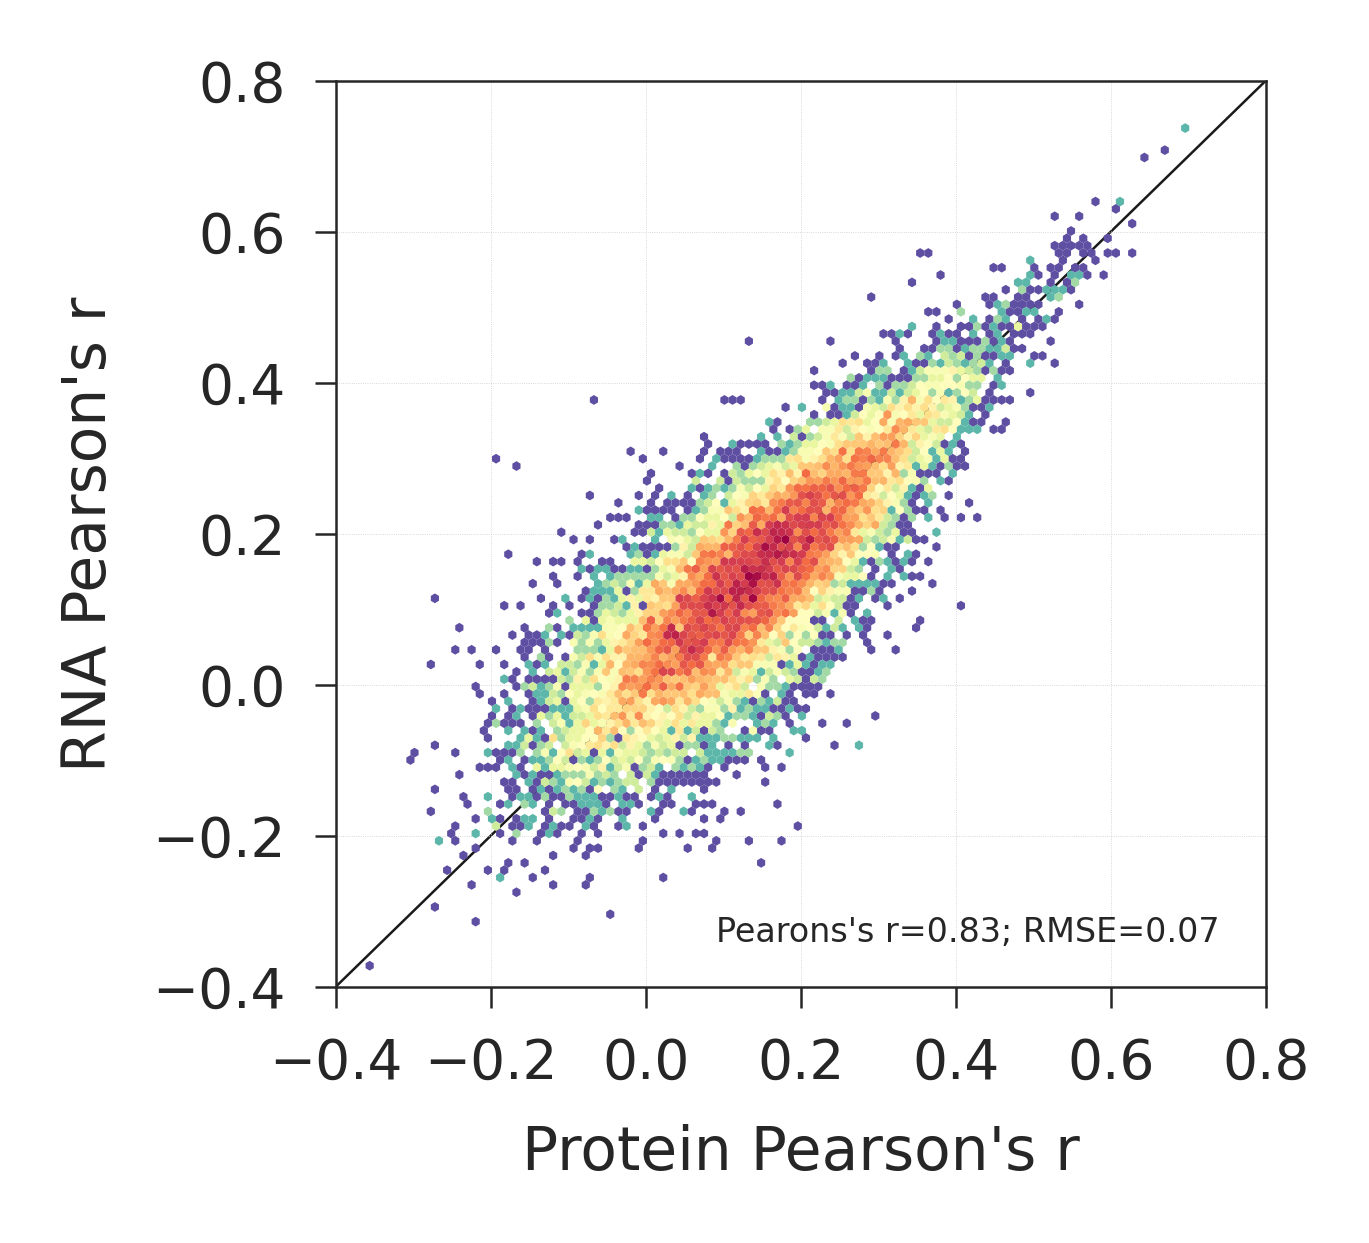

In [ ]:
x_var, y_var = "protein", "RNA"

plot_df = plot_df[[x_var, y_var]].dropna()

_, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=600)

ax.hexbin(
    plot_df[x_var],
    plot_df[y_var],
    cmap="Spectral_r",
    gridsize=100,
    mincnt=1,
    bins="log",
    lw=0,
)

ax.set_xlabel(f"Protein Pearson's r")
ax.set_ylabel(f"RNA Pearson's r")

ax.grid(True, ls=":", lw=0.1, alpha=1.0, zorder=0)

rmse = sqrt(mean_squared_error(plot_df[x_var], plot_df[y_var]))
cor, _ = pearsonr(plot_df[x_var], plot_df[y_var])
annot_text = f"Pearons's r={cor:.2g}; RMSE={rmse:.2f}"
ax.text(0.95, 0.05, annot_text, fontsize=4, transform=ax.transAxes, ha="right")

lims = [0.8, -0.4]
ax.plot(lims, lims, "k-", lw=0.3, zorder=0)
ax.set_xlim(lims[1], lims[0])
ax.set_ylim(lims[1], lims[0])

ax.set_xticks(np.arange(lims[1], lims[0], 0.2))
ax.set_yticks(np.arange(lims[1], lims[0], 0.2))

plt.savefig(f"{RPATH}/Predictive_power_scatter_crispr_{x_var}_{y_var}.pdf", bbox_inches="tight")
plt.savefig(f"{RPATH}/Predictive_power_scatter_crispr_{x_var}_{y_var}.png", bbox_inches="tight", dpi=600)


## Predictive power comparison Drug



In [ ]:
plot_df = pd.DataFrame(gc.open("Figures_Source_Data").worksheet("Fig4A_scatter_rna_protein_drug").get_all_values())
plot_df = plot_df.rename(columns=plot_df.iloc[0]).drop(plot_df.index[0]).set_index("drug_id").replace("", np.nan).astype(float)
plot_df

,RNA,protein,delta
drug_id,,,
1001;AICA Ribonucleotide;GDSC1,0.544548,0.567871,0.023324
1003;Camptothecin;GDSC2,0.739103,0.686693,-0.052410
1004;Vinblastine;GDSC1,0.569018,0.600648,0.031630
1004;Vinblastine;GDSC2,0.666154,0.720315,0.054161
1005;Cisplatin;GDSC1,0.424050,0.405853,-0.018198
...,...,...,...
88;Entinostat;GDSC1,0.209125,0.205165,-0.003960
89;Parthenolide;GDSC1,0.369786,0.343367,-0.026419
91;GSK319347A;GDSC1,0.407792,0.375071,-0.032721


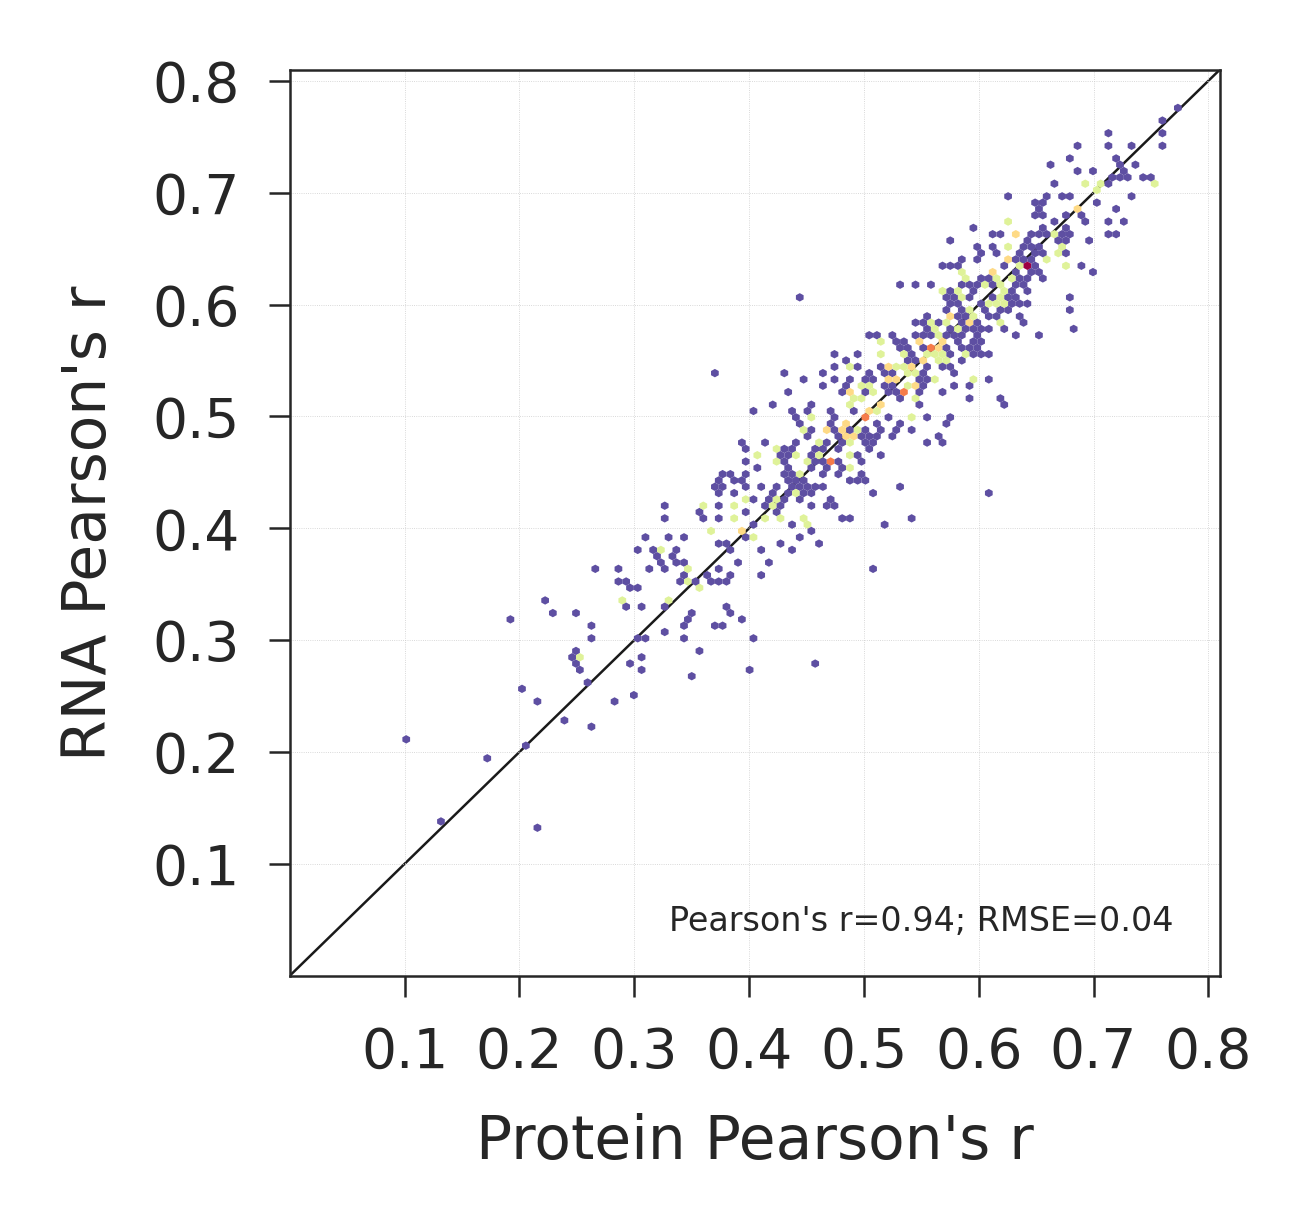

In [ ]:
x_var, y_var = "protein", "RNA"

plot_df = plot_df[[x_var, y_var]].dropna()

_, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=600)

ax.hexbin(
    plot_df[x_var],
    plot_df[y_var],
    cmap="Spectral_r",
    gridsize=100,
    mincnt=1,
    bins="log",
    lw=0,
)

ax.set_xlabel(f"Protein Pearson's r")
ax.set_ylabel(f"RNA Pearson's r")

ax.grid(True, ls=":", lw=0.1, alpha=1.0, zorder=0)

rmse = sqrt(mean_squared_error(plot_df[x_var], plot_df[y_var]))
cor, _ = pearsonr(plot_df[x_var], plot_df[y_var])
annot_text = f"Pearson's r={cor:.2g}; RMSE={rmse:.2f}"
ax.text(0.95, 0.05, annot_text, fontsize=4, transform=ax.transAxes, ha="right")

lims = [0.81, 0]
ax.plot(lims, lims, "k-", lw=0.3, zorder=0)
ax.set_xlim(lims[1], lims[0])
ax.set_ylim(lims[1], lims[0])

ax.set_xticks(np.arange(.1, .81, 0.1))
ax.set_yticks(np.arange(.1, .81, 0.1))

plt.savefig(f"{RPATH}/Predictive_power_scatter_drug_{x_var}_{y_var}.pdf", bbox_inches="tight")
plt.savefig(f"{RPATH}/Predictive_power_scatter_drug_{x_var}_{y_var}.png", bbox_inches="tight", dpi=600)


## Predictive power proteomics drug



In [ ]:
plot_df = pd.DataFrame(gc.open("Figures_Source_Data").worksheet("Fig4B_drug_sanger_ctd_prism_box").get_all_values())
plot_df = plot_df.rename(columns=plot_df.iloc[0]).drop(plot_df.index[0])

n_drugs = plot_df.groupby("drug_data")["drug_id"].unique().apply(lambda v: len(v))
plot_df = plot_df.replace({"drug_data": {k: f"{k} (N={v})" for k, v in n_drugs.iteritems()}})

plot_df["test_corr"] = plot_df["test_corr"].astype(float)
plot_df

,drug_id,test_corr,protein_data,drug_data
1,1001;AICA Ribonucleotide;GDSC1,0.554498,CCLE,Sanger (N=710)
2,1003;Camptothecin;GDSC2,0.672609,CCLE,Sanger (N=710)
3,1004;Vinblastine;GDSC1,0.422770,CCLE,Sanger (N=710)
4,1004;Vinblastine;GDSC2,0.486894,CCLE,Sanger (N=710)
5,1005;Cisplatin;GDSC1,0.225161,CCLE,Sanger (N=710)
...,...,...,...,...
5284,BRD-M80207679-001-01-5,-0.364437,ProCan&Sanger,PRISM (N=1389)
5285,BRD-M92675308-003-07-1,0.203936,ProCan&Sanger,PRISM (N=1389)
5286,BRD-M97302542-001-03-6,-0.096824,ProCan&Sanger,PRISM (N=1389)
5287,BRD-M97302542-001-04-4,0.244385,ProCan&Sanger,PRISM (N=1389)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


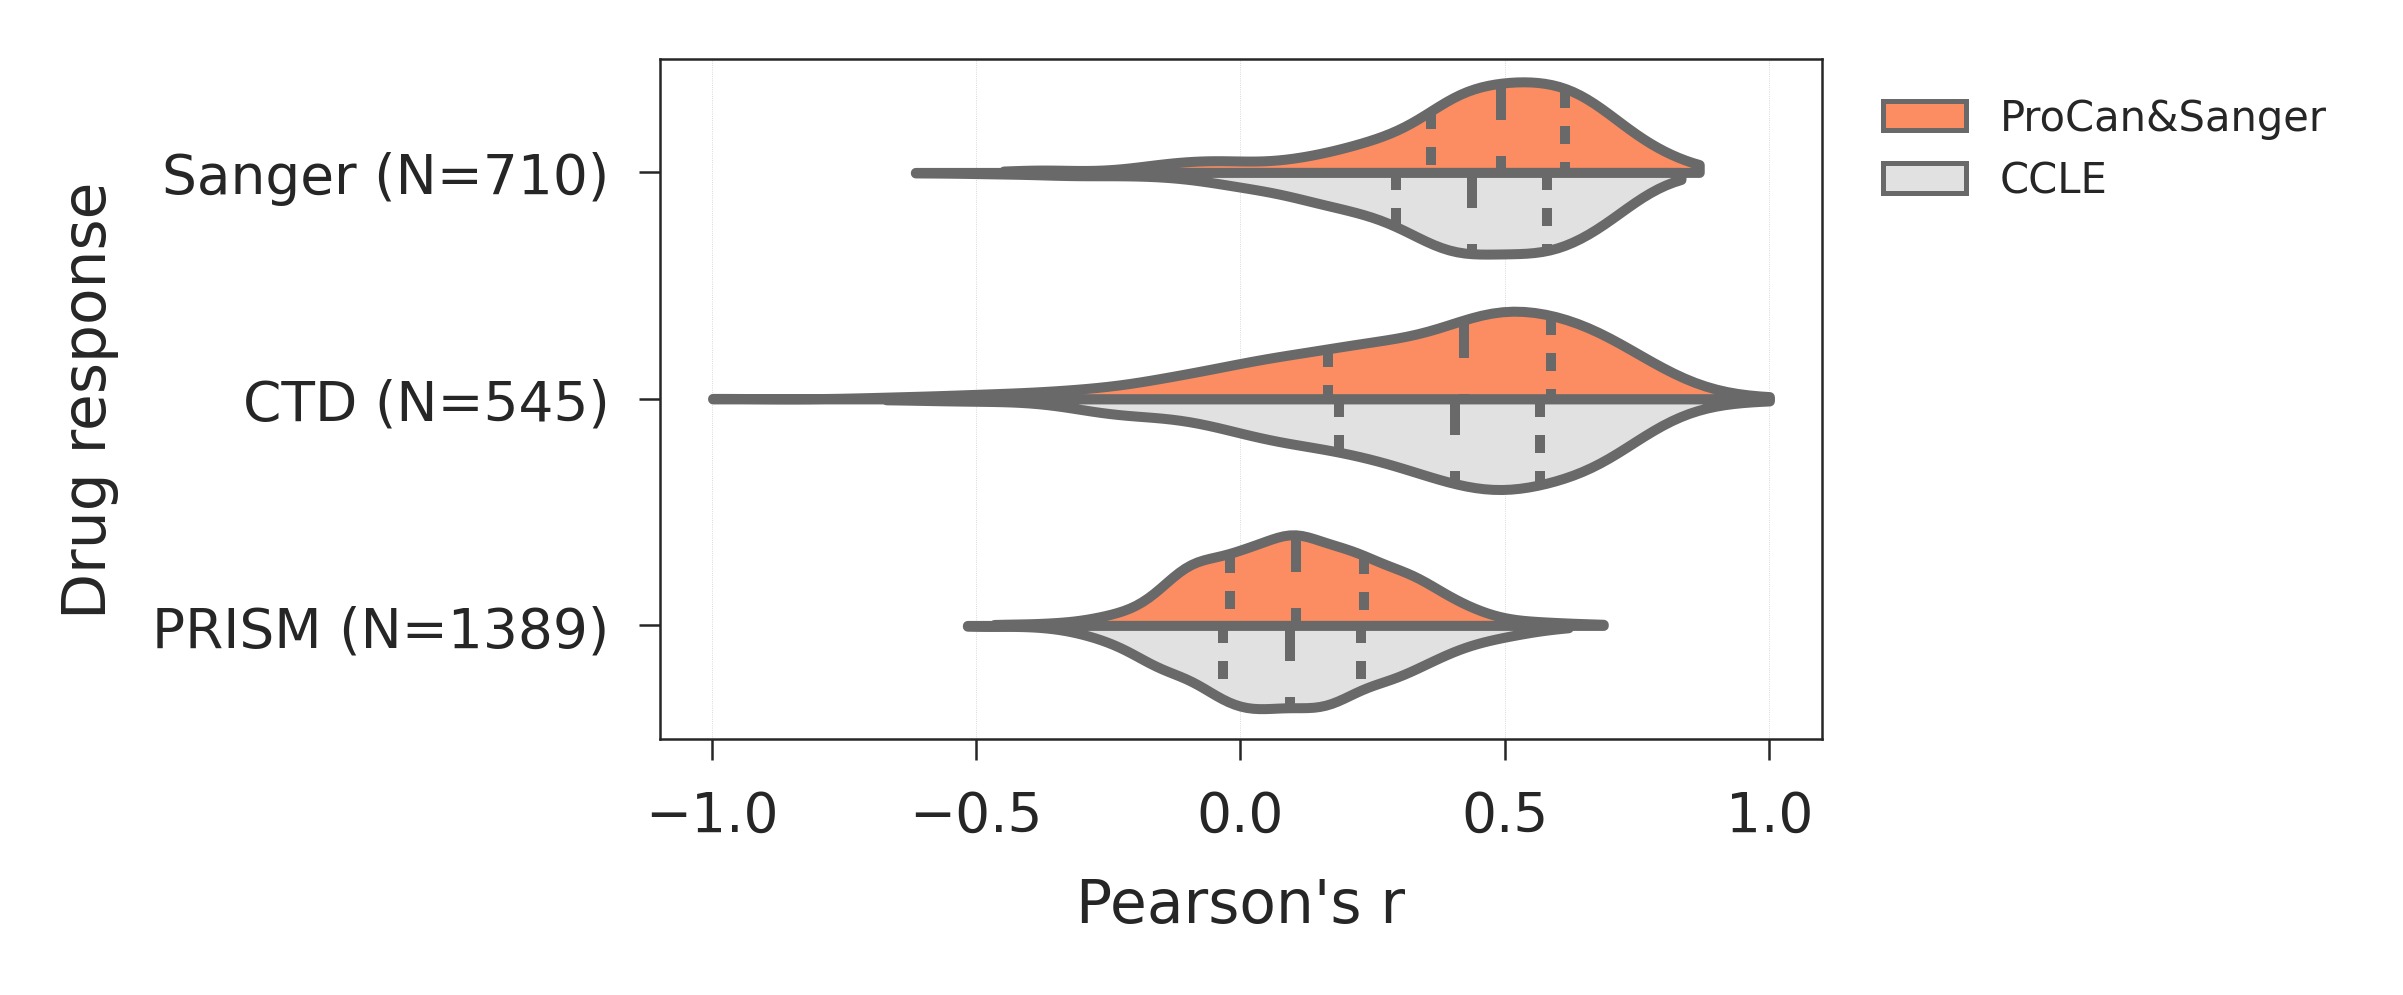

In [ ]:
pal = {"CCLE": CrispyPlot.PAL_DTRACE[0], "ProCan&Sanger": CrispyPlot.PAL_DTRACE[1]}

_, ax = plt.subplots(1, 1, figsize=(2.5, 1.5), dpi=600)

sns.violinplot("test_corr", "drug_data", data=plot_df, hue="protein_data", split=True, palette=pal, ax=ax, cut=0, inner="quartile", saturation=1, hue_order=['ProCan&Sanger', 'CCLE'])

ax.legend(prop={"size": 5}, frameon=False, title="", loc=2, bbox_to_anchor=(1.02, 1))

ax.grid(True, ls=":", lw=0.1, alpha=1.0, zorder=0, axis="x")

ax.set_xlabel("Pearson's r")
ax.set_ylabel("Drug response")

plt.savefig(f"{RPATH}/Predictive_proteomics_drug.pdf", bbox_inches="tight")
plt.savefig(f"{RPATH}/Predictive_proteomics_drug.png", bbox_inches="tight", dpi=600)


## Predictive power proteomics CRISPR

In [ ]:
plot_df = pd.DataFrame(gc.open("Figures_Source_Data").worksheet("Fig4C_crispr_vs_ccle").get_all_values())
plot_df = plot_df.rename(columns=plot_df.iloc[0]).drop(plot_df.index[0])
plot_df["test_corr"] = plot_df["test_corr"].astype(float)
plot_df["crispr_data"] = "Sanger&Broad"
plot_df

,Gene,test_corr,model,protein_data,crispr_data
1,A1BG,0.150895,DL,CCLE,Sanger&Broad
2,A1CF,0.290815,DL,CCLE,Sanger&Broad
3,A2M,0.408982,DL,CCLE,Sanger&Broad
4,A2ML1,-0.013475,DL,CCLE,Sanger&Broad
5,A3GALT2,-0.157167,DL,CCLE,Sanger&Broad
...,...,...,...,...,...
34968,ZYG11A,-0.104982,DL,ProCan&Sanger,Sanger&Broad
34969,ZYG11B,0.379162,DL,ProCan&Sanger,Sanger&Broad
34970,ZYX,0.319139,DL,ProCan&Sanger,Sanger&Broad
34971,ZZEF1,-0.088865,DL,ProCan&Sanger,Sanger&Broad


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


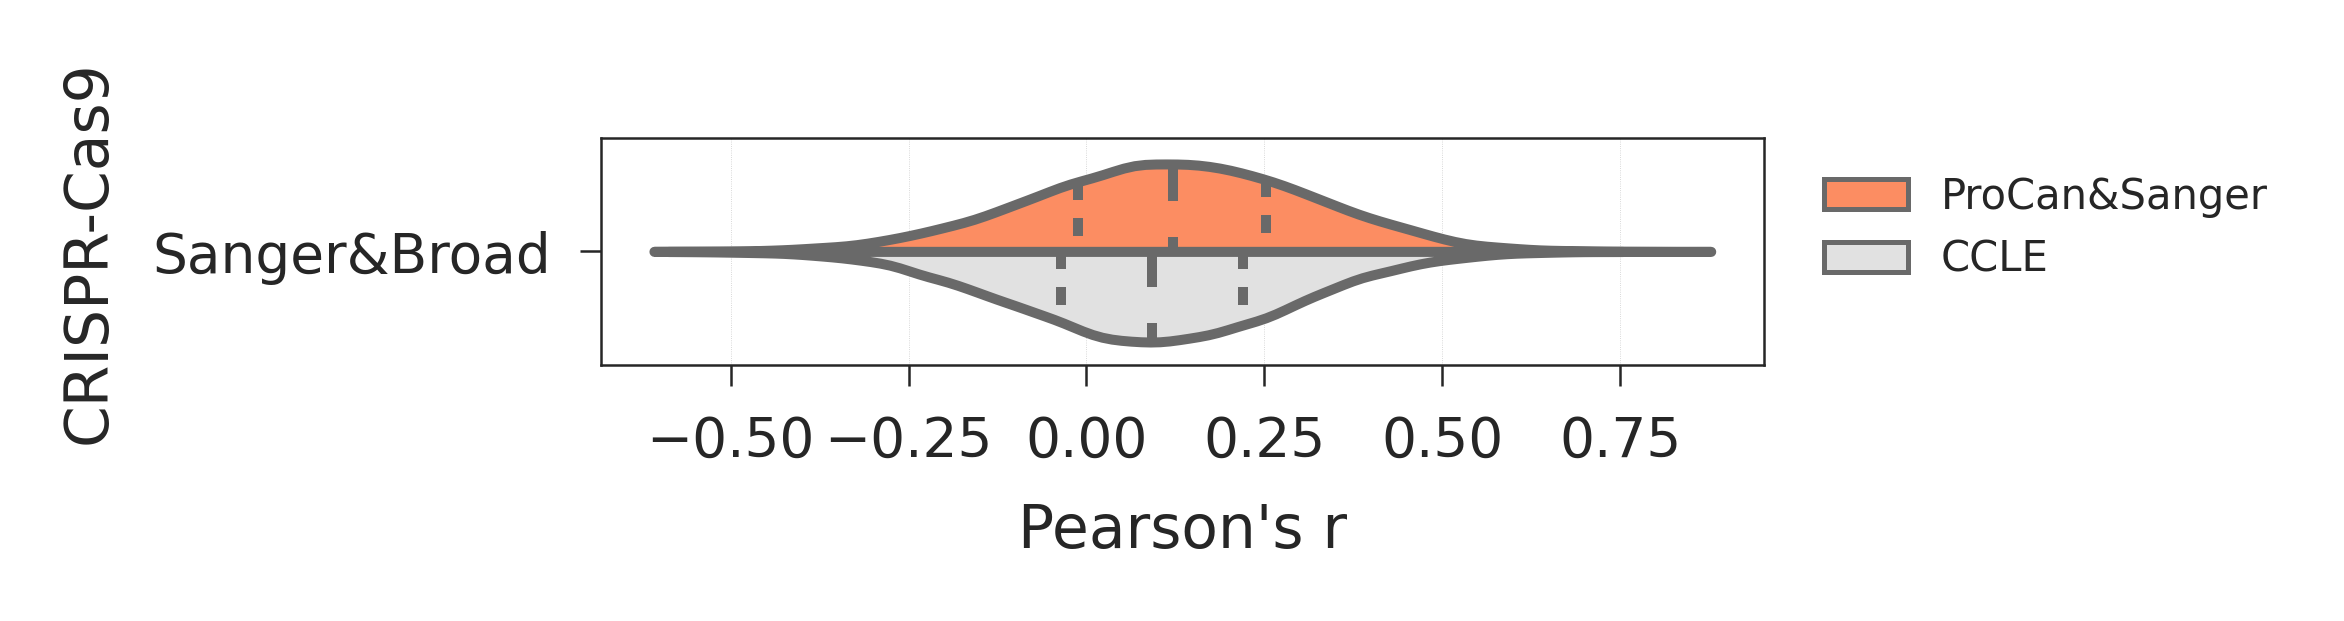

In [ ]:
pal = {"CCLE": CrispyPlot.PAL_DTRACE[0], "ProCan&Sanger": CrispyPlot.PAL_DTRACE[1]}

_, ax = plt.subplots(1, 1, figsize=(2.5, .5), dpi=600)

sns.violinplot("test_corr", "crispr_data", data=plot_df, hue="protein_data", split=True, palette=pal, ax=ax, cut=0, inner="quartile", saturation=1, hue_order=['ProCan&Sanger', 'CCLE'])

ax.legend(prop={"size": 5}, frameon=False, title="", loc=2, bbox_to_anchor=(1.02, 1))

ax.grid(True, ls=":", lw=0.1, alpha=1.0, zorder=0, axis="x")

ax.set_xlabel("Pearson's r")
ax.set_ylabel("CRISPR-Cas9")

plt.savefig(f"{RPATH}/Predictive_proteomics_crispr.pdf", bbox_inches="tight")
plt.savefig(f"{RPATH}/Predictive_proteomics_crispr.png", bbox_inches="tight", dpi=600)